In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
import seaborn

from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/Mushrooms.csv')

In [3]:
df.shape

(8124, 23)

In [4]:
df.isna().values.any()

False

In [5]:
df = df.iloc[:-4]

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [8]:
X = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
        'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
        'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type',
        'spore-print-color', 'population', 'habitat']]

y = df['class']

y = y.replace(to_replace = ['No', 'Yes'], value = [0, 1])

In [9]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [10]:
X = pd.get_dummies(X, 
                   prefix=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
        'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
        'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type',
        'spore-print-color', 'population', 'habitat'], 
                   columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
        'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
        'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number','ring-type',
        'spore-print-color', 'population', 'habitat'])

In [11]:
X.shape

(8120, 117)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [13]:
y_train.sort_values(inplace=True)
X_train = X_train.reindex(y_train.index)

In [14]:
y_test.sort_values(inplace=True)
X_test = X_test.reindex(y_test.index)

In [15]:
def blend(prob, colors=[[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0.77, 0]]):
    blended = []
    for p in prob:
        r, g, b = 0, 0, 0
        for i in range(len(colors)):
            r, g, b = r+p[i]*colors[i][0], g+p[i]*colors[i][1], b+p[i]*colors[i][2]
        blended.append([r, g, b]) 
    return blended

**Train the classifiers on:**
- X_train 

#### MLPClassifier, GaussianNB, KNeighborsClassifier, RandomForestClassifier, LogisticRegression


In [16]:
models = [MLPClassifier(), GaussianNB(), KNeighborsClassifier(),RandomForestClassifier(), LogisticRegression()]

In [17]:
labels = [x.__class__.__name__ for x in models]

In [18]:
model_predictions = []

In [19]:
X_train.shape

(6496, 117)

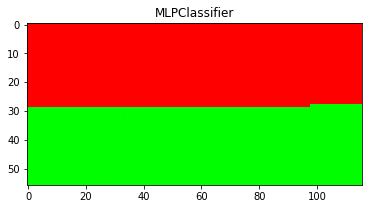

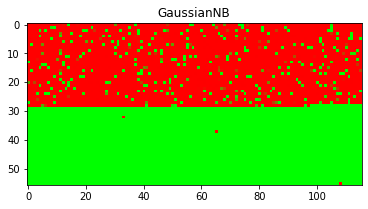

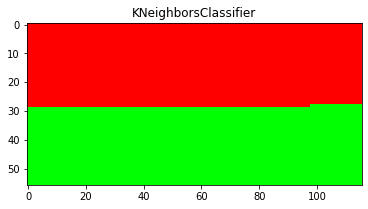

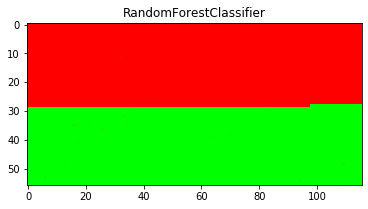

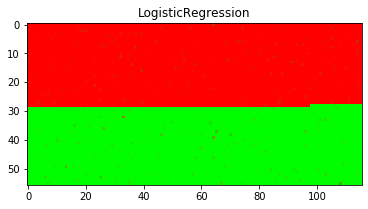

In [20]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    k = 0
    for i in range(56):
        row = []
        for j in range(116):
            row.append(blended[k])
            k+=1
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (70, 100, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [21]:
matrix = np.zeros((len(models), len(models)))

In [22]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

#### MLPClassifier

In [23]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_model_y_test_predictions = nn_model.predict(X_test)

**Train the other classifiers on:**
- X_train + more labeled points given by the "reference” model

In [24]:
X_train = np.concatenate((X_train, X_test), axis=0)

In [25]:
y_train = np.concatenate((y_train.to_numpy(), nn_model_y_test_predictions), axis=0)

In [26]:
model_predictions = []

In [27]:
X_train.shape

(8120, 117)

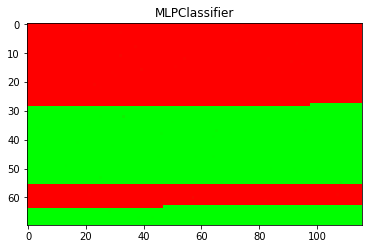

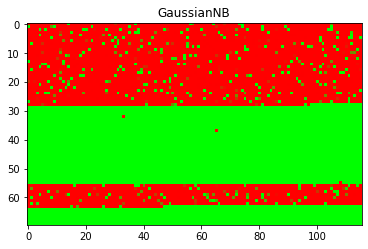

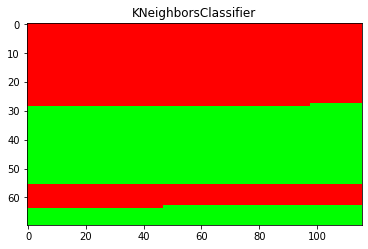

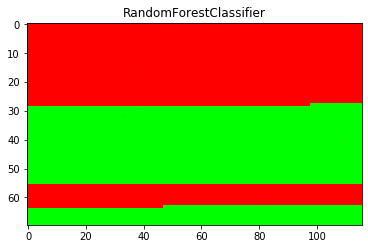

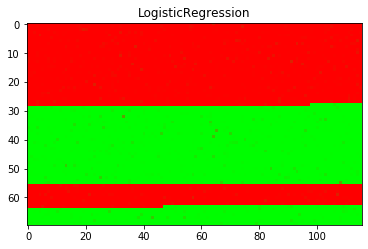

In [28]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    k = 0
    for i in range(70):
        row = []
        for j in range(116):
            row.append(blended[k])
            k+=1
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (70, 100, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [29]:
matrix2 = np.zeros((len(models), len(models)))

In [30]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix2[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

#### Comparison

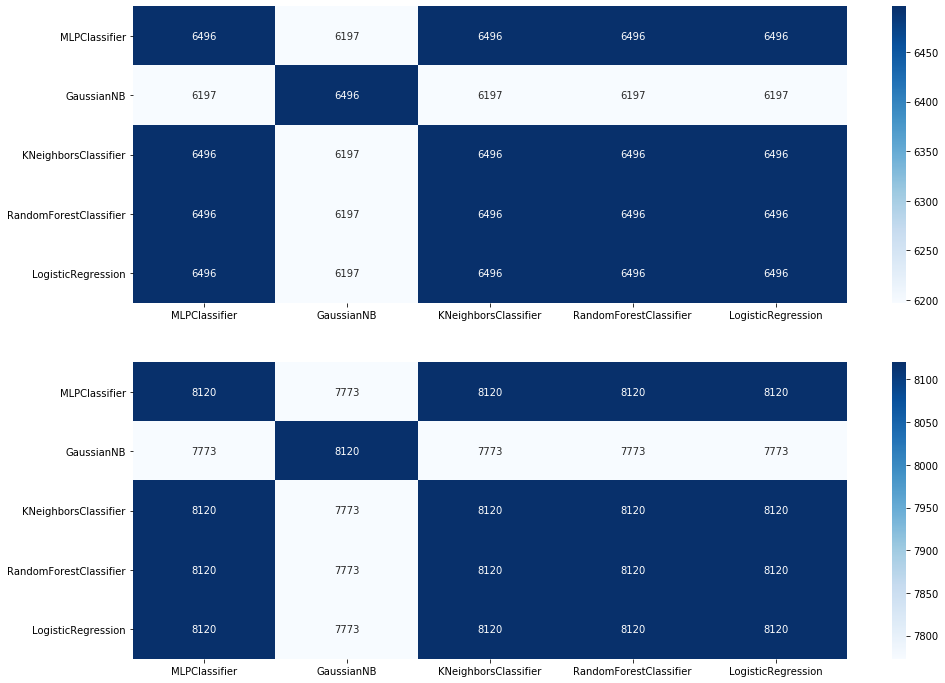

In [31]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
seaborn.heatmap(matrix, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')
plt.subplot(212)
seaborn.heatmap(matrix2, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')

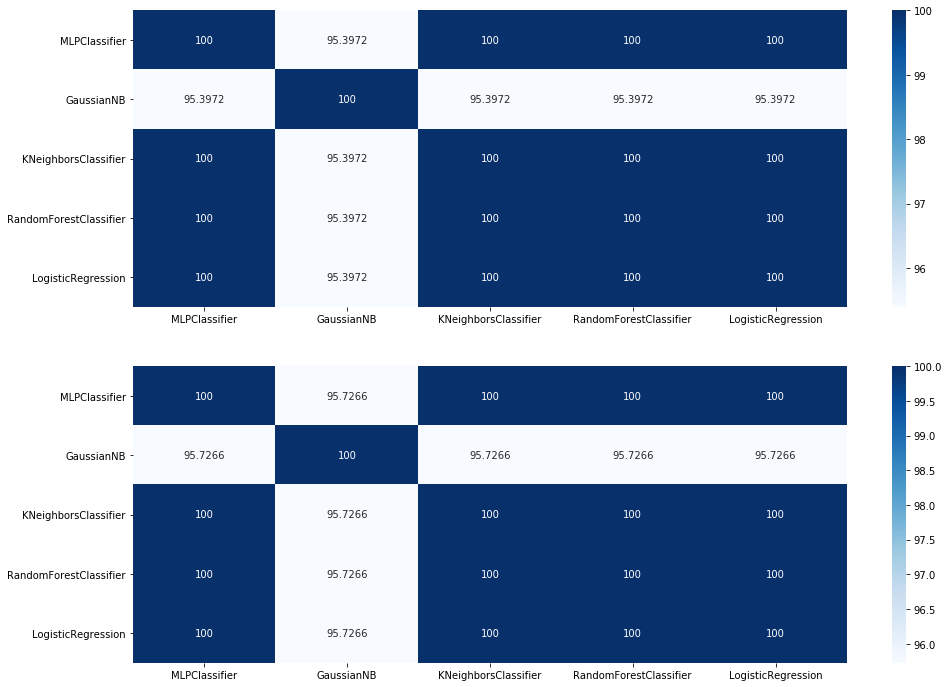

In [32]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
seaborn.heatmap(matrix / matrix.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')
plt.subplot(212)
seaborn.heatmap(matrix2 / matrix2.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')

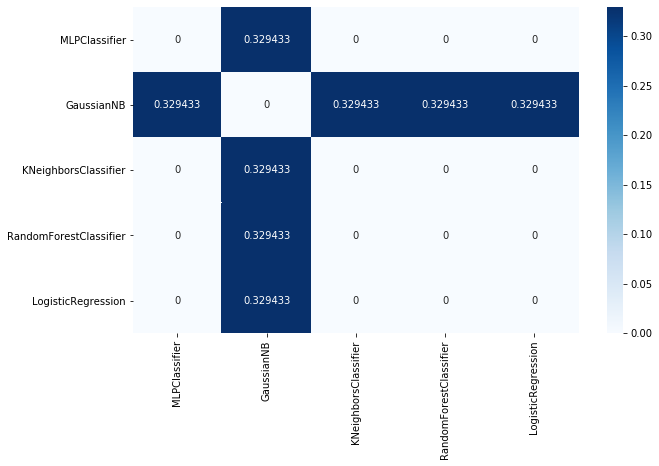

In [33]:
plt.figure(figsize=(10, 6))
seaborn.heatmap(matrix2 / matrix2.max() * 100 - matrix / matrix.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')